# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
boston = pd.read_csv('../data/boston_data.csv')

In [4]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [9]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [5]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

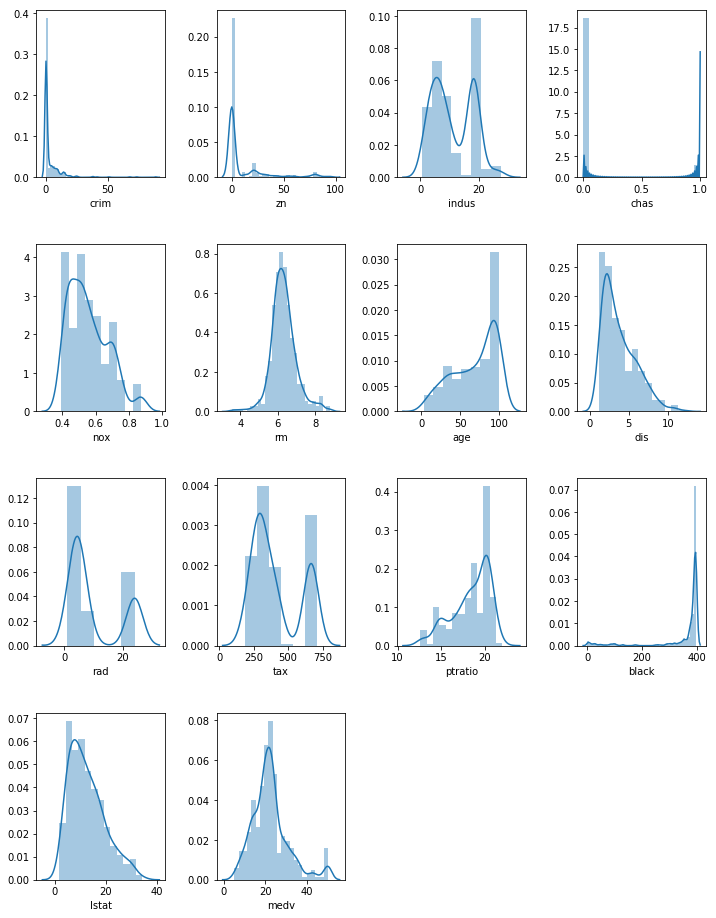

In [12]:
f, ax = plt.subplots(4,4, figsize=(12,16))

f.delaxes(ax[3,2])
f.delaxes(ax[3,3])

plt.subplots_adjust(wspace=0.4,hspace=0.4)

i = 0
for row in ax:
    for col in row:
        if i == 14:
            break
        else:
            sns.distplot(boston[boston.columns[i]], ax=col)
            i += 1

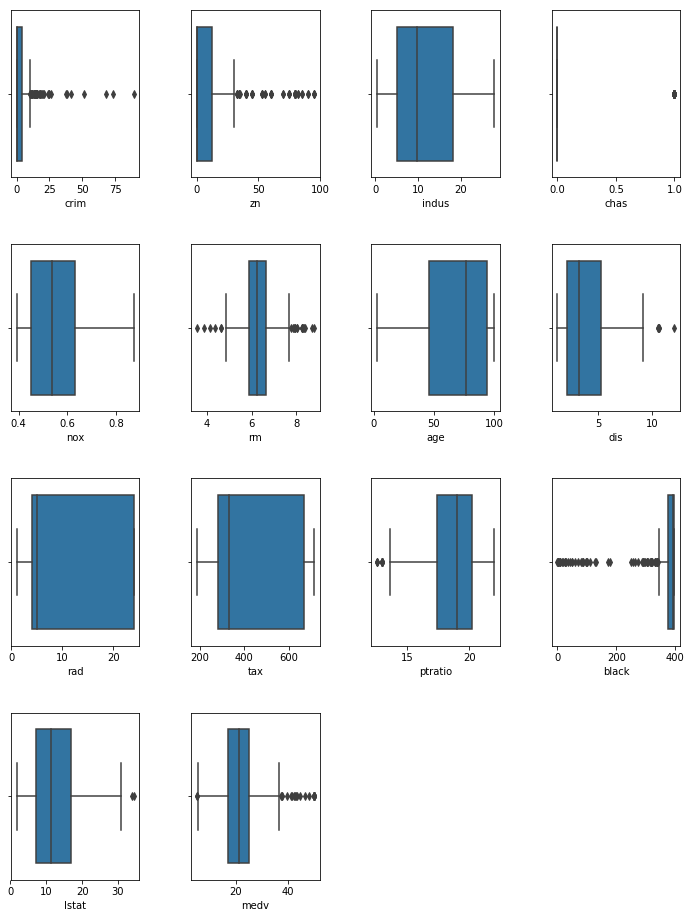

In [13]:
f, ax = plt.subplots(4,4, figsize=(12,16))

f.delaxes(ax[3,2])
f.delaxes(ax[3,3])

plt.subplots_adjust(wspace=0.4,hspace=0.4)

i = 0
for row in ax:
    for col in row:
        if i == 14:
            break
        else:
            sns.boxplot(boston[boston.columns[i]], ax=col)
            i += 1

In [10]:
# Remove outliers

boston_OLrem = pd.DataFrame()

for col in boston.columns:
    q1 = boston[col].quantile(0.25)
    q3 = boston[col].quantile(0.75)
    iqr = q3 - q1
    if col not in ['chas',]:
        boston_OLrem[col] = boston[col].apply(lambda x: x if x > q1 - 5 * iqr and x < q3 + 5 * iqr else np.nan)
    else:
        boston_OLrem[col] = boston[col]

In [11]:
boston_OLrem.isna().sum()

crim        18
zn          33
indus        0
chas       404
nox          0
rm           1
age          0
dis          0
rad          0
tax          0
ptratio      0
black       47
lstat        0
medv        12
dtype: int64

In [14]:
boston['chas'].value_counts()

0.0    376
1.0     28
Name: chas, dtype: int64

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [25]:
round(boston.corr().loc['medv'],2)

crim      -0.40
zn         0.36
indus     -0.50
chas       0.14
nox       -0.44
rm         0.68
age       -0.39
dis        0.26
rad       -0.42
tax       -0.50
ptratio   -0.51
black      0.36
lstat     -0.74
medv       1.00
Name: medv, dtype: float64

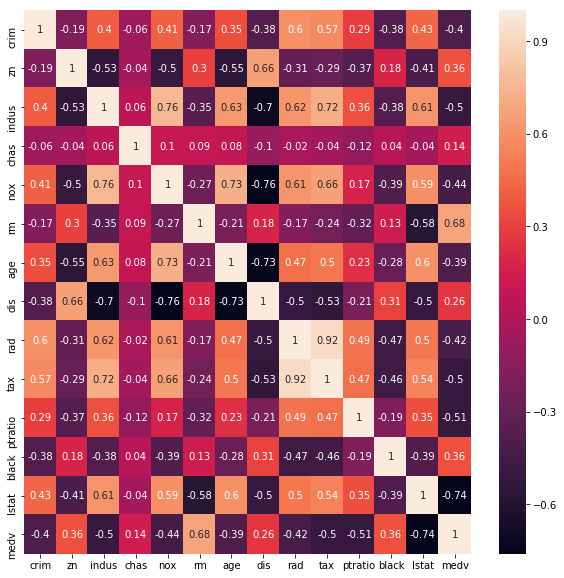

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(round(boston.corr(),2),annot=True)

In [26]:
# The variables that are most correlated with the price ware rm and lstat

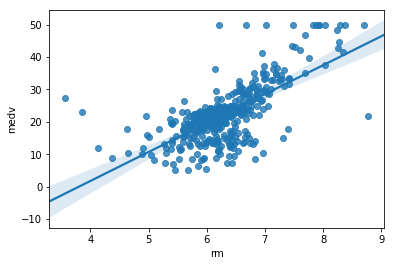

In [31]:
sns.regplot(x='rm',y='medv',data=boston)

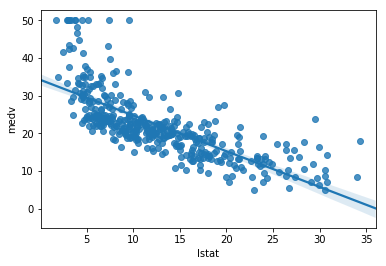

In [30]:
sns.regplot(x='lstat',y='medv',data=boston)

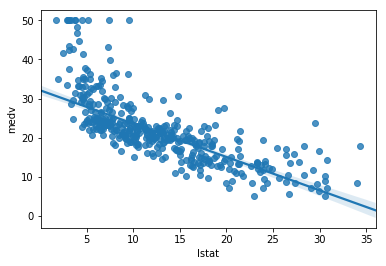

In [33]:
sns.regplot(x='lstat',y='medv',data=boston,robust=True,)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [34]:
# The price of homes shows a positive correlated with the number of rooms and a 
# negative correlation with the % lower status of the population

# Both relationships were expected

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

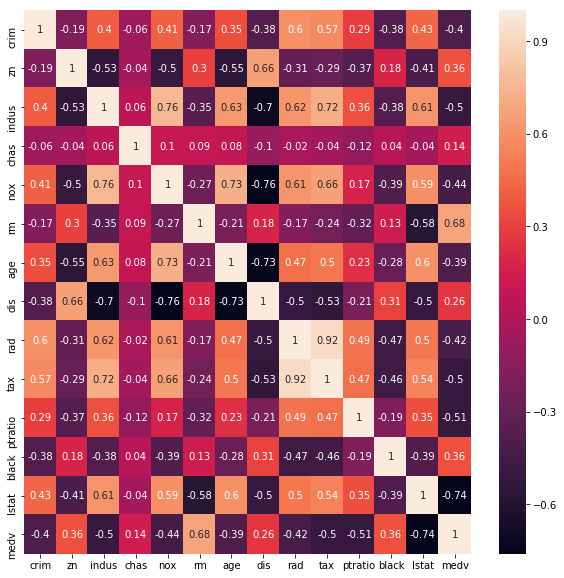

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(round(boston.corr(),2),annot=True)

In [36]:
# No, the other variables do not present such a strong correlation (max 0.5 in absolute value)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [37]:
boston['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [ ]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [38]:
from sklearn.model_selection import train_test_split

In [48]:
boston_shuffled = boston.sample(len(boston))

In [49]:
boston.shape

(404, 14)

In [50]:
boston_shuffled.shape

(404, 14)

In [52]:
X = boston_shuffled[['rm','lstat']]

In [53]:
y = boston_shuffled['medv']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [64]:
import warnings

In [65]:
warnings.filterwarnings('ignore')

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
from sklearn.metrics import r2_score

In [97]:
# Five separate RFR here with the given max depths

# RFR = random forest regressor

max_depths = [2,4,6,8,10]
scores_train = []
scores_test = []

for maxdepth in max_depths:
    rfr = RandomForestRegressor(max_depth=maxdepth)
    rfr.fit(X_train,y_train)
    scores_train.append(rfr.score(X_train,y_train))
    scores_test.append(rfr.score(X_test,y_test))

Now, plot the score for each tree on the training set and on the testing set.

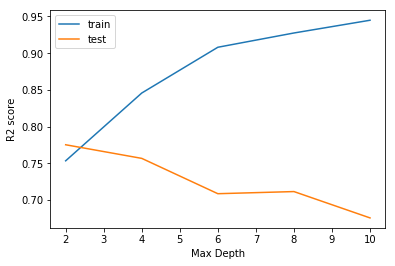

In [98]:
# Produce a plot with the score for the testing and training for the different max depths

plt.plot(max_depths,scores_train)
plt.plot(max_depths,scores_test)
plt.legend(['train','test'])
plt.xlabel('Max Depth')
plt.ylabel('R2 score')
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [75]:
# The increase of max_depth leads the model to overfit the training data (high variance)
# That's why the r2 score increases for the training data with the max_depth, while it doesn't for the test data

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [76]:
# With a max_depth = 1, the model suffers from high bias and low variance (underfitting)

# With a max_depth = 10, the model suffers from a low bias and high variance (overfitting)

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [77]:
# From the results above, it seems that a max_depth of 2 would result in the best r2 score for the test data

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [80]:
# Obviously, the model could not be used to predict the median price of a house, since the circumstances have changed a lot,
# and probably the parameters that play a key role have changed

# It would also be nice to include other features.

# The performance of the model on the test data with a maximum depth of 4 is not optimal (r2 ~ 0.7). Maybe 
# we could try how other parameters affect the random forest regresor and include other variables in the model.
# Also, other regression models should be tested.
# In addition, no outliers were removed, and the data was not scaled.

# Most likely the data collected in an urban city is not at all applicable in a rural city where other factors are
# much more important.

### Scale data

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [83]:
X_scaled = scaler.fit_transform(X)

In [94]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [99]:
# Five separate RFR here with the given max depths

# RFR = random forest regressor

max_depths = [2,4,6,8,10]
scores_train_scaled = []
scores_test_scaled = []

for maxdepth in max_depths:
    rfr = RandomForestRegressor(max_depth=maxdepth)
    rfr.fit(X_train_scaled,y_train_scaled)
    scores_train_scaled.append(rfr.score(X_train_scaled,y_train_scaled))
    scores_test_scaled.append(rfr.score(X_test_scaled,y_test_scaled))

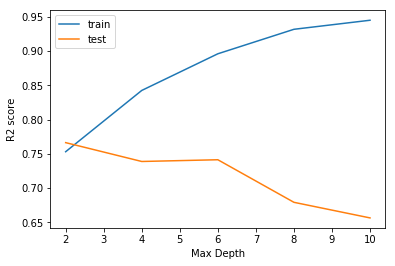

In [100]:
# Produce a plot with the score for the testing and training for the different max depths

plt.plot(max_depths,scores_train_scaled)
plt.plot(max_depths,scores_test_scaled)
plt.legend(['train','test'])
plt.xlabel('Max Depth')
plt.ylabel('R2 score')
plt.show()

In [101]:
# The results are very similar in comparison to when the data was not scaled

### Use all features to predict

In [103]:
X_all = boston_shuffled.drop('medv',axis=1)
y_all = boston_shuffled['medv']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [105]:
# Five separate RFR here with the given max depths

# RFR = random forest regressor

max_depths = [2,4,6,8,10]
scores_train = []
scores_test = []

for maxdepth in max_depths:
    rfr = RandomForestRegressor(max_depth=maxdepth)
    rfr.fit(X_train,y_train)
    scores_train.append(rfr.score(X_train,y_train))
    scores_test.append(rfr.score(X_test,y_test))

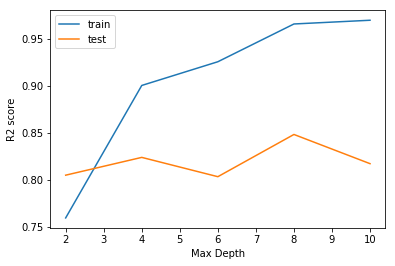

In [106]:
# Produce a plot with the score for the testing and training for the different max depths

plt.plot(max_depths,scores_train)
plt.plot(max_depths,scores_test)
plt.legend(['train','test'])
plt.xlabel('Max Depth')
plt.ylabel('R2 score')
plt.show()

### Use all features (scaled)

In [109]:
X_scaled = scaler.fit_transform(X)

In [110]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [111]:
# Five separate RFR here with the given max depths

# RFR = random forest regressor

max_depths = [2,4,6,8,10]
scores_train_scaled = []
scores_test_scaled = []

for maxdepth in max_depths:
    rfr = RandomForestRegressor(max_depth=maxdepth)
    rfr.fit(X_train_scaled,y_train_scaled)
    scores_train_scaled.append(rfr.score(X_train_scaled,y_train_scaled))
    scores_test_scaled.append(rfr.score(X_test_scaled,y_test_scaled))

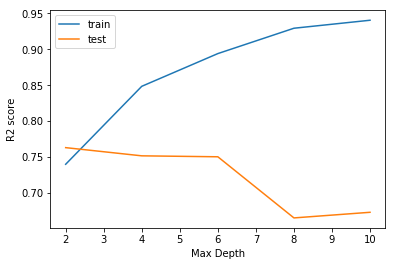

In [112]:
# Produce a plot with the score for the testing and training for the different max depths

plt.plot(max_depths,scores_train_scaled)
plt.plot(max_depths,scores_test_scaled)
plt.legend(['train','test'])
plt.xlabel('Max Depth')
plt.ylabel('R2 score')
plt.show()